<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Model Selection

In this notebook we will start by generating some noisy data, and fitting it with different models. Your assignment is to write some Python code to choose which model fits the data best. 

The generated data is designed so that it is not obvious what model will fit best. This often happens in real-world problems. In this notebook, we have the chance of finding out the _best fitting_ model while already knowing what model generated the data. So, one of the learning objectives should be to recognise the ambiguity that affects model selection when the data is noisy.

## Data

We define two variables, `x` and `y`, that follow a parabolic relationship with some noise.


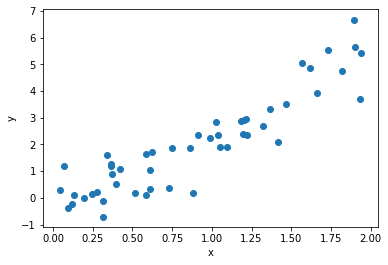

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # setting the random seed makes the example reproducible

x = np.random.uniform(0,2,size=50)
y = x + x**2 + np.random.normal(0,0.75,size=50)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Cross validation

We will fit a number of models to our data, starting with a linear model (i.e. a straight line) and a quadratic model (i.e. a parabola) and then trying something more complicated. To be able to use the `LinearRegression` class in the Python package `sklearn` we first build a two-dimensional array `x_array` containing all data that we may eventually need.

In [2]:
x2 = x*x
x3 = x**3

x_array = np.array([x,x2,x3]).T

### Q1:

To be able to compare the model, we need a test set that is different from the train set. So here is our first question:
   split the `x_array` and `y` data in two sets: `X_train`, `y_train` and `X_test`, `y_test`.  Put __70% of the data in the train set, and 30% in the test set__. Remember to import the necessary functions. Also, use __`random_state = 51`__ to obtain a train/test split that allows you to go through the assignment. Not making these specific choices will result in the assignment and following questions being graded as  incorrect.

**Hint:** 

* import the necessary module
* create the variables `X_train`, `y_train`, `X_test` and `y_test` for the training and testing the future model

In [5]:
# (approx. 2 lines of code)
### START ANSWER HERE ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.3, random_state=51)
### END ANSWER HERE ###

In [6]:
print('X_train first 3 values ', X_train[:3])
print('X_train.shape = ', X_train.shape, '\t y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, '\t y_test.shape = ', y_test.shape)

X_train first 3 values  [[1.66488528 2.771843   4.61480062]
 [1.19731697 1.43356792 1.7164352 ]
 [1.9398197  3.76290049 7.29934851]]
X_train.shape =  (35, 3) 	 y_train.shape =  (35,)
X_test.shape =  (15, 3) 	 y_test.shape =  (15,)


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> X_train[:3]</td> 
        <td> [[1.66488528 2.771843   4.61480062]
 [1.19731697 1.43356792 1.7164352 ]
 [1.9398197  3.76290049 7.29934851]]
        </td> 
    </tr>
    <tr> 
        <td> X_train.shape</td> 
        <td> (35, 3) </td> 
    </tr>
    <tr> 
        <td> y_train.shape</td> 
        <td> (35, ) </td> 
    </tr>
    <tr> 
        <td> X_test.shape</td> 
        <td> (15, 3) </td> 
    </tr>
    <tr> 
        <td> y_test.shape</td> 
        <td> (15, ) </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


Next, we are going to fit the data. Our first model is a straight line, i.e., a linear function of x. We will extract the first column from our data, containing the $x$ term. We need a `.reshape(-1,1)` call, otherwise numpy will drop the "dummy" dimension and convert our two-dimensional array to a one-dimensional vector.


### Q2:
Your task is now to fit and calculate the fit score. Look at the course material to see how to import the `LinearRegression` class from `sklearn.linear_model`, create an instance of the class, and call the `.fit()` method on the `X_train_1` and `y_train` variables. 

Call this `LinearRegression` instance `model_1`, because we will use it later to graph the model.
Put the fit score in a variable called `score_1`. Use the default score function, $R^2$, so that you don't need to specify it in the `.score()` call. 

**Hint**: you have a train and a test set, consider when it is appropriate to use each of them.

In [8]:
X_train_1 = X_train[:,0].reshape(-1,1)
X_test_1  = X_test[:,0].reshape(-1,1)

# (approx. 4 lines of code)
### START ANSWER HERE ###
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train)
score_1 = model_1.score(X_test_1, y_test)
### END ANSWER HERE ###

In [9]:
print('R2 score = ', score_1)

R2 score =  0.4066655977517857


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> R2</td> 
        <td> 0.4066655977517857
        </td> 
    </tr>
</table> 

In [10]:
# nbgrader cell


Let's now plot the model we just fit. We will use `LinearRegression.predict` to get the predicted $y$'s for all values of `x`. As above, we have to reshape our input.

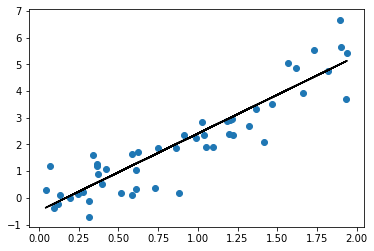

In [11]:
y_pred_1 = model_1.predict(x_array[:,0].reshape(-1,1))

plt.scatter(x,y)
plt.plot(x,y_pred_1,color='black')
plt.show()

By looking at the graph above, and by considering that we got an $R^2$ score larger than 0.4, our straight-line fit might already be acceptable. Let's now see if we can do better. Let's consider a parabolic model, i.e. one where the y is function of both x and $x^2$.

We first extract the first two columns from `X_train` and `X_test`. We don't need anymore to call `.reshape()` because now we are extracting more than just one column.

### Q3:
Your task is to fit and calculate the score for the quadratic model `model_2`. Store the score in a variable called `score_2`. The score should be improved over that for the straight-line model.

In [12]:
X_train_2 = X_train[:,0:2]   # NB intervals in python are right-open
X_test_2  = X_test[:,0:2]

# (approx. 3 lines of code)
### START ANSWER HERE ###
model_2 = LinearRegression()
model_2.fit(X_train_2,  y_train)
score_2 = model_2.score(X_test_2, y_test)
### END ANSWER HERE ###

In [13]:
print('R2 score = ', score_2)

R2 score =  0.5145244243521923


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> R2</td> 
        <td> 0.5145244243521923
        </td> 
    </tr>
</table> 

In [14]:
# nbgrader cell


Now, let's make a new plot where the quadratic fit is shown alongside the straight-line fit. We use the green colour to draw the `model_2` prediction.

Since the $x$ are not ordered, so `plt.plot()` can produce a messy plot; we use np.sort() to sort `x` and `y_pred_2` when plotting the parabola.

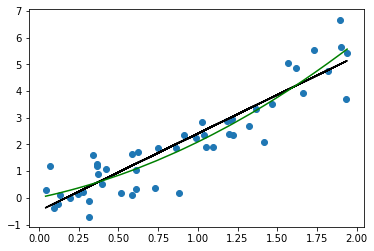

In [15]:
y_pred_2 = model_2.predict( x_array[:,0:2] )

plt.scatter(x,y)
plt.plot(x,y_pred_1,color='black')
plt.plot(np.sort(x),np.sort(y_pred_2),color='green')

plt.show()

Having improved the fit by going from a first-degree polynomial (the straight line) to a second-degree polynomial (the parabola), we might think to keep going on and using a slightly more complex model: a third degree polynomial. Will it improve the fit again?

### Q4:

Your task is to define the variables `X_train_3` and `X_test_3`, populating them with the all three columns of `X_train` and `X_test`. Then, fit the model `model_3` and store the score in the variable `score_3`.

In [16]:
# (approx. 5 lines of code)
### START ANSWER HERE ###
X_train_3 = X_train[:,0:3]
X_test_3 = X_test[:,0:3]
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)
score_3 = model_3.score(X_test_3, y_test)
### END ANSWER HERE ###

In [17]:
print('R2 score = ', score_3)

R2 score =  0.5007346296870665


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> R2</td> 
        <td> 0.5007346296870665
        </td> 
    </tr>
</table> 

In [18]:
# nbgrader cell


So, the fit score is actually worse now than it was with the parabolic model! Take a moment to think why this happened. Then, let's try and understand it by plotting the data and the model. We will make a slight change in the way we plot to make things clearer.

This time we use a blue colour for the data in the train set, and a red colour for the data in the test set. Then, on top of the data, we plot the quadratic model in a green colour and the cubic model in a brown colour. 

Note that we need to call `plt.scatter()` twice: once for the train set (use `X_train[:,0]` to get the train set's $x$) and once for the test set. You also need to call `plt.plot()` twice, once for the parabolic and once for the cubic model.

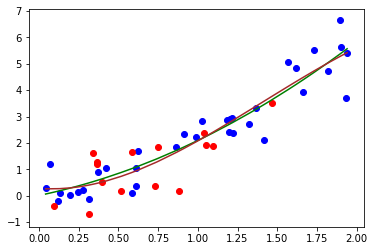

In [19]:
y_pred_3 = model_3.predict( x_array[:,0:3] )

plt.scatter(X_train[:,0],y_train, color='blue')
plt.scatter(X_test[:,0],y_test, color='red')

plt.plot(np.sort(x),np.sort(y_pred_2),color='green')
plt.plot(np.sort(x),np.sort(y_pred_3),color='brown')
plt.show()

The difference is subtle, but it can be appreciated by looking at the plot. Focus first on the blue points (the train set): the cubic model tries to go through the train set. The cubic model has one more degree of freedom than the parabolic model, so it can actually better follow the arrangement of the blue points; if you calculate and print the fit score for the train set, the cubic model should have the best fit score (you can do this as an exercise).

However, much of the point arrangement is due to chance. Focus now on the red points: the cubic model does not really pass closer to them than the quadratic model does. This is why we split our data in train and test sets when doing cross validation: to have an independent check that our model is fitting the underlying structure of our data, instead of just following the random arrangement of points (we would call that "overfitting").

The role of the test set is therefore just as important as that of the train set, and in no way one should think that data is "wasted" by retaining part of it for the test set.

### Q5:

The last question for this part of the assignment is the following: having fit and compared three different model using cross validation, which one would you choose for the current data, and why?
1. I choose model 1 (straight line): the simpler, the better! Also, the plot with the straight line looks good enough for my needs.
2. I choose model 2 (parabolic curve): it has the best fit score for the test set.
3. I choose model 3 (cubic curve): it has the best fit score for the train set.
4. All of them are equally good, because the data is noisy.
5. All of them are equally bad, because no model touches all points.

In [22]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q5_answer = [Your answer]
### START ANSWER HERE ###
Q5_answer = [2]
### END ANSWER HERE ###

In [23]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if (_myhash(Q5_answer[0])=='c81e728d9d4c2f636f067f89cc14862c')&(_myhash(len(Q5_answer))=='c4ca4238a0b923820dcc509a6f75849b'):
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


Cross validation is a simple and powerful way to estimate how good your model is. However, there is one pitfall: the random split between train and test set can sometimes be "unlucky", creating ephemeral structures in the train or test set that can have a leverage on the model, but that would disappear if the split is repeated with a different random seed. If you want to see an example, re-run this notebook using `random_state=52` when you do the train/test split: you will fail some of the grading cells, but if you run it until the plot for the third model, you will see that the particular choice of the test set will give the straight-line model the best score! (When you finish experimenting, don't forget to put back `random_state=51` and run everything again from beginning).

One could think of using more than one train/test couple of sets to avoid this risk. This is actually a good idea that can be further developed into $k$-fold cross validation.

## $k$-fold cross validation

Recall from the reading material, that one can use the `cross_val_score` function from `scikit-learn.model_selection` to split the data. It provides a simplified interface to $k$-fold cross-validation so we don't have to deal with train and test set indices ourserlves. Have a look at the [manual page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

### Q6:

Use the `cross_val_score` with `scoring='r2'` cross-validator to fit linear, parabolic and cubic models to our data.

**Hint:**
* import necessary package
* define a `LinearRegression` instance
* call `cross_val_score` three times. Use `x_array[:,0].reshape(-1,1)` as $x$ for the linear model, `x_array[:,0:2]` for the parabolic model, and just `x_array` for the cubic model (compare with the code in previous questions). Set the `cv=7`, so that we will have 7 different picks for the train/test sets. 

Store the results from the tree `cross_val_score` calls in variables called `cv_1`, `cv_2`, `cv_3`.
Finally, we will print the average scores in the three cases.

In [24]:
# (approx. 5 lines of code)
### START ANSWER HERE ###
from sklearn.model_selection import cross_val_score
linear_regression = LinearRegression()
cv_1 = cross_val_score(linear_regression, x_array[:,0].reshape(-1,1), y, cv=7, scoring='r2')
cv_2 = cross_val_score(linear_regression, x_array[:,0:2], y, cv=7, scoring='r2')
cv_3 = cross_val_score(linear_regression, x_array[:,0:3], y, cv=7, scoring='r2')
### END ANSWER HERE ###

In [25]:
print('mean R2 cv_1 = %f \t mean R2 cv_2 = %f \t mean R2 cv_3 = %f' %(np.mean(cv_1), np.mean(cv_2), np.mean(cv_3)))

mean R2 cv_1 = 0.706786 	 mean R2 cv_2 = 0.768979 	 mean R2 cv_3 = 0.753204


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> mean R2 cv_1</td> 
        <td> 0.706786
        </td> 
    </tr>
    <tr> 
        <td> mean R2 cv_2</td> 
        <td> 0.768979
        </td> 
    </tr>
    <tr> 
        <td> mean R2 cv_3</td> 
        <td> 0.753204
        </td> 
    </tr>
</table> 

In [26]:
# nbgrader cell


As we saw in the case of simple cross validation, the parabolic model gets a better score than the linear and cubic score. However, if we look at the average scores, we see that they are higher than what we got earlier in the previous questions. Why is that? Instead of just looking at averages, let's plot all the scores that we got. We will use a [boxplot](https://en.wikipedia.org/wiki/Box_plot) to show the distribution of all scores.

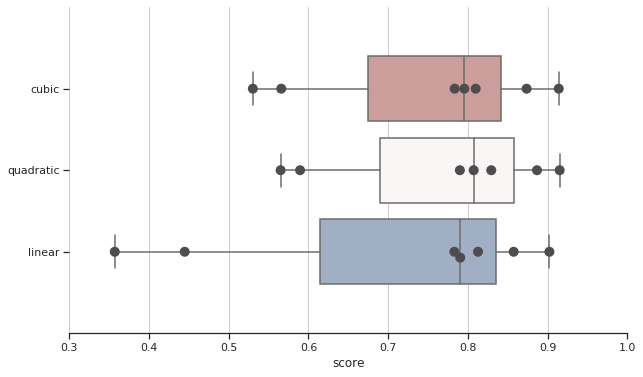

In [27]:
import seaborn as sns  # Seaborn is an alternative plotting package for python, see http://seaborn.pydata.org
import pandas as pd

n = cv_1.shape[0]
cv_df = pd.DataFrame({'score':np.concatenate((cv_1,cv_2,cv_3)),'method':np.concatenate([['linear'] * n + ['quadratic'] * n + ['cubic'] * n])})

sns.set(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="score", y="method", data=cv_df,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="score", y="method", data=cv_df,
              size=10, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim([0.3, 1.0])
ax.set_ylim([-1, 3])
sns.despine(trim=True, left=True)

The vertical line inside each box is the median of the scores; the box shows the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range). Each black dot is the score for one of the random picks in our 7-fold cross validation.

Think again about what model should be chosen, and also about why the scores in the previous questions were so different from the averages we got in Q6.

### Q7 (multiple choice):

Look at the plot above and choose which ones from the following statements are true:
 1. The quadratic model should be preferred because the median score is larger and the variance smallest.
 2. The cubic model should be preferred because there is one case where it performs better than any other.
 3. The scores in the previous questions (Q1-Q5) were lower just by chance! It was due to an unlucky choice of the random number generator seed.
 4. In the end, simple cross-validation is as effective as k-fold cross-validation.
 5. Simple cross-validation can be sensitive to small-number effects, so k-fold cross-validation should be preferred.

In [28]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q7_answer = [7,8]

### START ANSWER HERE ###
Q7_answer = [1,3,5]
### END ANSWER HERE ###

In [29]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q7_answer))=='e77261952e47cec62134d2d763c64232':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


# Good job!